In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#drop one duplicate record with same city name, same ride_ids but different # of drivers
city_data = city_data.drop_duplicates('city', keep = 'first')

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city"])
# Display the data table for preview

In [2]:
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

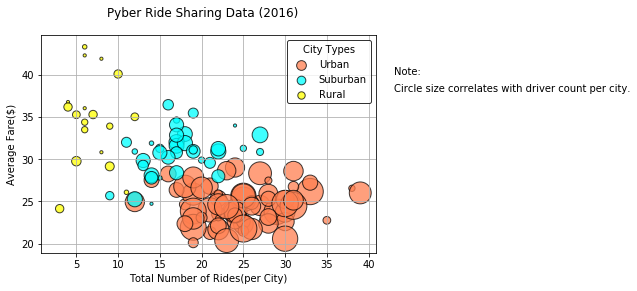

In [3]:
# Obtain the x and y coordinates for each of the three city types
city_ride_data_grpby = city_ride_data.groupby('city')

ride_count = city_ride_data_grpby['ride_id'].count()
average_fare = city_ride_data_grpby['fare'].mean()
driver_count = city_ride_data_grpby.mean()['driver_count']
city_type = city_data.set_index('city')['type']

ride_summary = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": average_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

#munging

ride_summary.sort_values('Number of Drivers', ascending = False)

#separate dfs for city categories
rural = ride_summary[ride_summary['Type of City'] == 'Rural']
suburban = ride_summary[ride_summary['Type of City'] == 'Suburban']
urban = ride_summary[ride_summary['Type of City'] == 'Urban']

plt.suptitle('Pyber Ride Sharing Data (2016)')
# turn on the grid
plt.grid()
# Build the scatter plots for each city types
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = 'coral', edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = 'aqua', edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = 'yellow', edgecolor = 'black', label = 'Rural', alpha = .75)

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides(per City)')
plt.ylabel('Average Fare($)')

# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black', title = 'City Types')
lgnd.legendHandles[0]._sizes = [95]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [55]
# Incorporate a text label regarding circle size
plt.text(43, 40,"Note:")
plt.text(43, 38,"Circle size correlates with driver count per city.")
# Save Figure
plt.savefig('Pyberbubblechart.jpg')


In [4]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


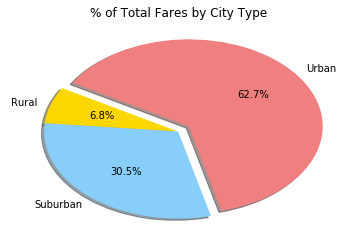

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


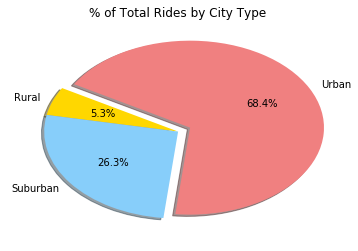

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


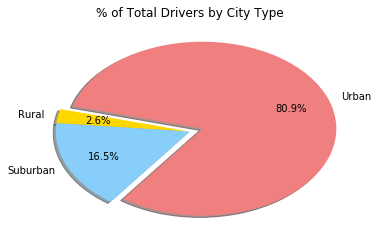

In [6]:
# Show Figure
plt.show()